# ADORB Carbon LCA Calculator
### ADORB / FCALC cost is a full-cost-accounted annualized life-cycle cost metric for building projects.

#### Updated: 11/15/2022


In [233]:
# Manage dependencies
import pandas as pd
import os
os.chdir('C:/Users/amitc_crl/OneDrive/Documents/GitHub/REVIVE/ADORB')

In [234]:
maint = [(15000,5),(2000,10)]

print(maint[0][1])

5


In [235]:


def adorb(analysisPeriod, annualElec, annualGas, annualCO2, dirMR, emCO2, eTrans):
    results = pd.DataFrame(columns=['pv_dirEn', 'pv_opCO2', 'pv_dirMR', 'pv_emCO2', 'pv_eTrans'])
    years = range(analysisPeriod)
    pv = []
    r2 = []
    pc= 0.25
    # Dependencies and databasing
    NatEmiss = pd.read_csv('NatlEmission.csv')

    



    k_dirEn = 0.02
    k_opCarb = 0.075
    k_dirMR = 0.02
    k_emCarb = 0
    k_sysTran = 0.02


    # annual sum of all high level sub routines, run those first then run 
    for i in years:
        c_dirMR = []
        year = i+1
        
        # Direct energy costs
        pv_dirEn = ((annualElec * 0.15) + (annualGas * 1.26))/((1+k_dirEn)**year)

        # Cost of operational carbon
        c_opCarb = annualCO2 * pc
        pv_opCO2 = c_opCarb/((1+k_opCarb)**year)

        # Cost of embodied carbon

        # For Level 1 embodied carbon calc (national emissions intensity based):

        # Right now there is no decarbonization glide path applied to embodied emissions (i.e. of recurring equipment replacements).

        # C_emCarb_y = (emMat_y + emLbr_y)*Pc
        # emMat_y is the embodied emissions due of the material items in year y [kg]
        # emLbr_y is the embodied emissions due to domestic / installation labor of the items in year y [kg]

        # emMat_y = sum, over the project retrofit and maintenance items, of emMat_item_y
        # emMat_item_y is the embodied emissions of the material item [kg].

        # emMat_item_y = C_dirMR_item_y * (1-LF_item_y) * EF(CoO_item_y)
        # LF_item_y is the fraction of install labor in C_dirMR_item_y [fraction 0 to 1].
        # EF(country) is the national emission factor of a country [kg/$].
        # CoO_item_y is the country of origin for the item occurring in year y.

        # EF(country) = CO2_country / GDP_country * 1000
        # CO2_country is the annual CO2e emissions from the country [Megatons].
        # GDP_country is the annual gross domestic product of the country [USD millions].

        # EF, CO2 and GDP data for the top 15 US trading partners is shown in Table 1.

        # emLbr_y = sum, over the project retrofit and maintenance items, of emLbr_item_y
        # emLbr_item_y is the embodied emissions due to labor, of the item occurring in year y.

        # emLbr_item_y = C_dirMR_item_y * LF_item_y * EF(COPL)
        # COPL is the country of the project location / building site.


        c_emCO2 = []
        for row in emCO2:
            if row[1] == i:
                c_emCO2.append(0.75*(row[0]/((1+k_emCarb)**year)))
            else:
                c_emCO2.append(0)
        pv_emCO2 = sum(c_emCO2)

        # Cost of direct maint / retrofit
        for row in dirMR:
            # c_dirMR = []
            if row[1] == i:
                c_dirMR.append(row[0]/((1+k_dirMR)**year))
            else:
                c_dirMR.append(0)
        pv_dirMR = sum(c_dirMR)
            


        # Cost of energy transition
        pv_eTrans = (eTrans)/((1+k_sysTran)**year)


        pv.append((pv_dirEn + pv_opCO2 + pv_dirMR + pv_emCO2 + pv_eTrans))
        newRow = {'pv_dirEn':pv_dirEn, 'pv_opCO2':pv_opCO2, 'pv_dirMR':pv_dirMR, 'pv_emCO2':pv_emCO2, 'pv_eTrans':pv_eTrans}
        results = results.append(newRow, ignore_index=True)
        # test = pd.DataFrame(newRow, columns = ['pv_dirEn', 'pv_opCO2', 'pv_dirMR', 'emCO2', 'eTrans'])
        # test.head()
        # results.append(pd.DataFrame(newRow, columns=['pv_dirEn', 'pv_opCO2', 'pv_dirMR', 'emCO2', 'eTrans']), ignore_index=True)

    #print(pv)
    # results.head()
    results.to_csv('results.csv')

    return sum(pv)

        # PV_i = sum over y from 1 to N of C_i_y / (1+k_i^y) , where
        # C_i  is the Cost, of cost component i [$].
        # k_i is the discount rate for cost component i [fraction 0 to 1].
        # k_dirEnr = 0.02
        # k_opCarb = 0
        # k_dirMR = 0.02
        # k_emCarb = 0
        # y is the year, counting from the current year = 1, that is, the future calendar year minus the previous calendar year.


Total ADORB = $649140.7141313355


C:\Users\amitc_crl\AppData\Local\Temp\ipykernel_24552\2825866333.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(newRow, ignore_index=True)
C:\Users\amitc_crl\AppData\Local\Temp\ipykernel_24552\2825866333.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(newRow, ignore_index=True)
C:\Users\amitc_crl\AppData\Local\Temp\ipykernel_24552\2825866333.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(newRow, ignore_index=True)
C:\Users\amitc_crl\AppData\Local\Temp\ipykernel_24552\2825866333.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = result

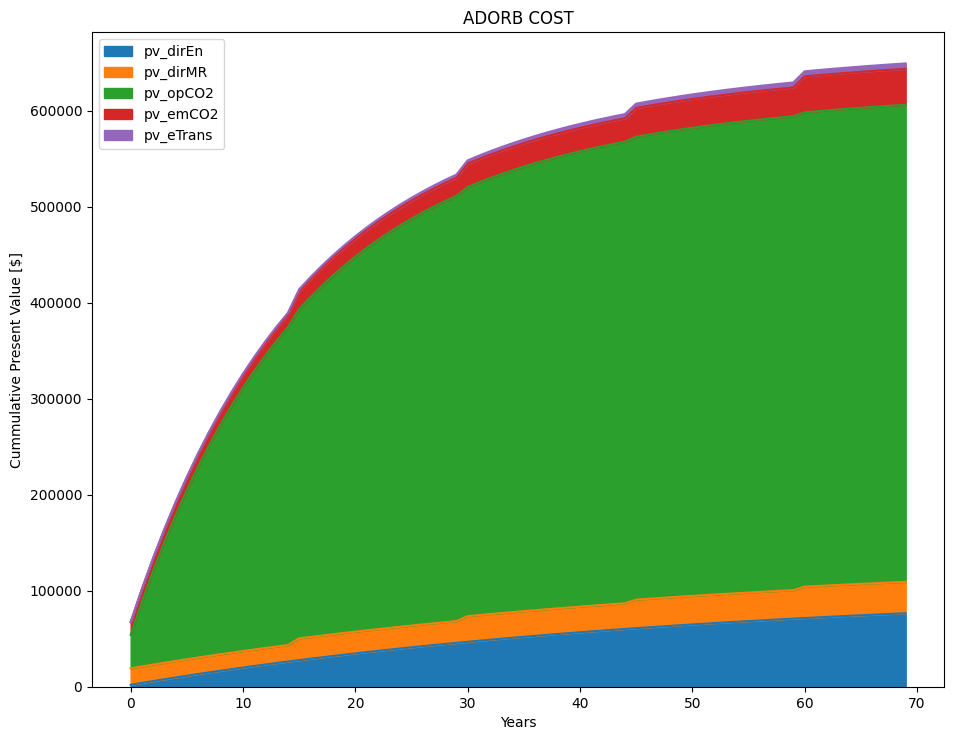

In [236]:
# Inputs
duration = 70
annualElec = 1000
annualGas = 1500
annualCO2 = 150000
dirMR = [(17500,0),(7500,15),(7500,30),(7500,45),(10000,60)]
emCO2 = [(17500,0),(7500,15),(7500,30),(7500,45),(10000,60)] 
eTrans = 150

# Dependencies and databasing
NatEmiss = pd.read_csv('NatlEmission.csv')

# testing the function
final = adorb(duration, annualElec, annualGas, annualCO2, dirMR, emCO2, eTrans)

df = pd.read_csv('results.csv')

df2 = pd.DataFrame()
df2['pv_dirEn'] = df['pv_dirEn'].cumsum()
df2['pv_dirMR'] = df['pv_dirMR'].cumsum()
df2['pv_opCO2'] = df['pv_opCO2'].cumsum()
df2['pv_emCO2'] = df['pv_emCO2'].cumsum()
df2['pv_eTrans'] = df['pv_eTrans'].cumsum()

df2.plot(kind='area', xlabel='Years', ylabel='Cummulative Present Value [$]', title='ADORB COST', figsize=(11,8.5))

print('Total ADORB = $' + str(final))


C:\Users\amitc_crl\AppData\Local\Temp\ipykernel_24552\2825866333.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(newRow, ignore_index=True)
C:\Users\amitc_crl\AppData\Local\Temp\ipykernel_24552\2825866333.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(newRow, ignore_index=True)
C:\Users\amitc_crl\AppData\Local\Temp\ipykernel_24552\2825866333.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(newRow, ignore_index=True)
C:\Users\amitc_crl\AppData\Local\Temp\ipykernel_24552\2825866333.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = result

Total ADORB = $567277.1855934011


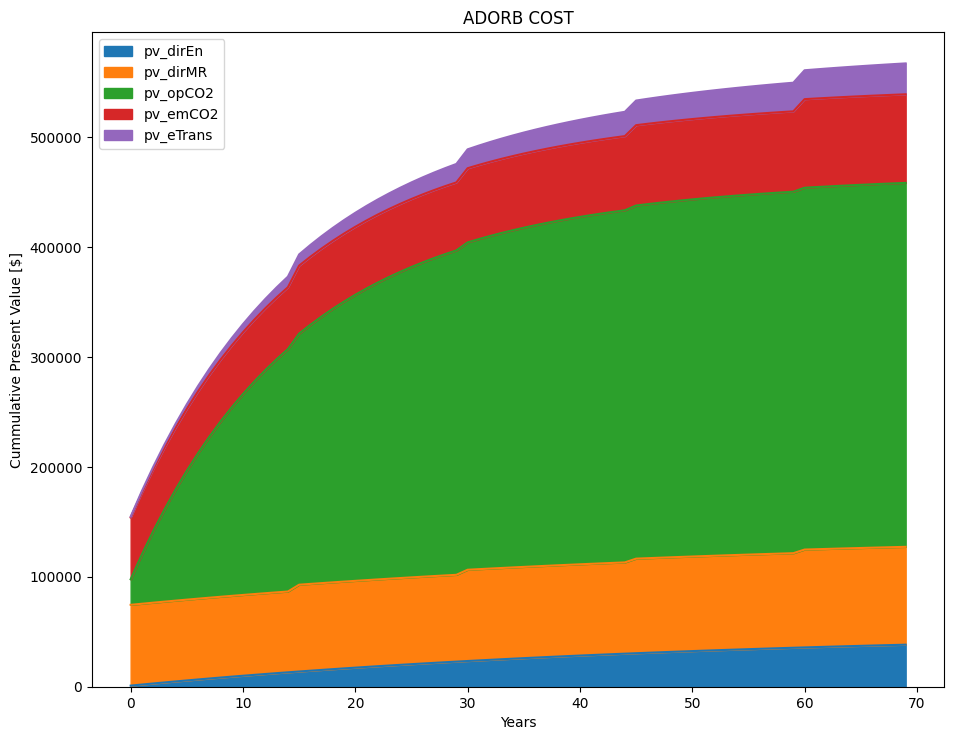

In [237]:
# Inputs
duration = 70
annualElec = 500
annualGas = 750
annualCO2 = 100000
dirMR = [(75000,0),(7500,15),(7500,30),(7500,45),(10000,60)]
emCO2 = [(75000,0),(7500,15),(7500,30),(7500,45),(10000,60)] 
eTrans = 750

# Dependencies and databasing
NatEmiss = pd.read_csv('NatlEmission.csv')

# testing the function
final = adorb(duration, annualElec, annualGas, annualCO2, dirMR, emCO2, eTrans)

df = pd.read_csv('results.csv')

df2 = pd.DataFrame()
df2['pv_dirEn'] = df['pv_dirEn'].cumsum()
df2['pv_dirMR'] = df['pv_dirMR'].cumsum()
df2['pv_opCO2'] = df['pv_opCO2'].cumsum()
df2['pv_emCO2'] = df['pv_emCO2'].cumsum()
df2['pv_eTrans'] = df['pv_eTrans'].cumsum()

df2.plot(kind='area', xlabel='Years', ylabel='Cummulative Present Value [$]', title='ADORB COST', figsize=(11,8.5))

print('Total ADORB = $' + str(final))


C:\Users\amitc_crl\AppData\Local\Temp\ipykernel_24552\2825866333.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(newRow, ignore_index=True)
C:\Users\amitc_crl\AppData\Local\Temp\ipykernel_24552\2825866333.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(newRow, ignore_index=True)
C:\Users\amitc_crl\AppData\Local\Temp\ipykernel_24552\2825866333.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(newRow, ignore_index=True)
C:\Users\amitc_crl\AppData\Local\Temp\ipykernel_24552\2825866333.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = result

Total ADORB = $369041.72935359855


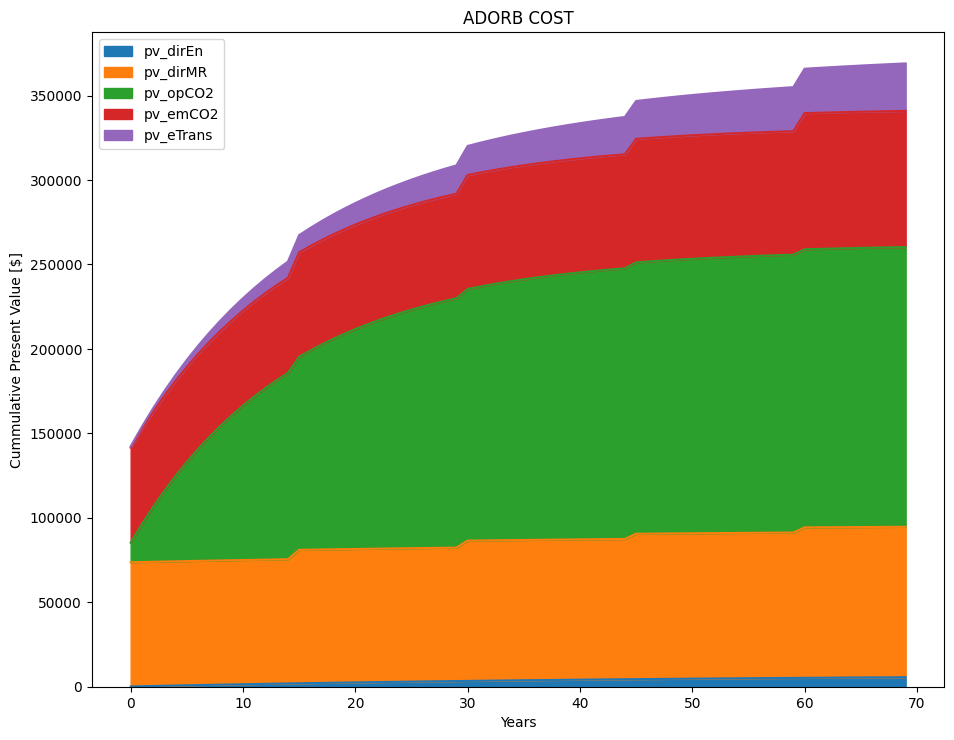

In [238]:
# Inputs
duration = 70
annualElec = 1000
annualGas = 0
annualCO2 = 50000
dirMR = [(75000,0),(7500,15),(7500,30),(7500,45),(10000,60)]
emCO2 = [(75000,0),(7500,15),(7500,30),(7500,45),(10000,60)] 
eTrans = 750

# Dependencies and databasing
NatEmiss = pd.read_csv('NatlEmission.csv')

# testing the function
final = adorb(duration, annualElec, annualGas, annualCO2, dirMR, emCO2, eTrans)

df = pd.read_csv('results.csv')

df2 = pd.DataFrame()
df2['pv_dirEn'] = df['pv_dirEn'].cumsum()
df2['pv_dirMR'] = df['pv_dirMR'].cumsum()
df2['pv_opCO2'] = df['pv_opCO2'].cumsum()
df2['pv_emCO2'] = df['pv_emCO2'].cumsum()
df2['pv_eTrans'] = df['pv_eTrans'].cumsum()

df2.plot(kind='area', xlabel='Years', ylabel='Cummulative Present Value [$]', title='ADORB COST', figsize=(11,8.5))

print('Total ADORB = $' + str(final))
